In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris_data = pd.read_csv('W04-IrisData.csv')

In [3]:
# Filter out Versicolor and Virginica samples
filtered_data = iris_data[iris_data['Species'].isin(['Iris-versicolor', 'Iris-virginica'])]

In [4]:
# Select the required features and label
filtered_data = filtered_data[['PetalLengthCm', 'SepalWidthCm', 'Species']]

In [5]:
# Set ground truth labels
filtered_data['Species'] = filtered_data['Species'].apply(lambda x: 1 if x == 'Iris-versicolor' else -1)

In [6]:
# Separate Versicolor and Virginica
versicolor = filtered_data[filtered_data['Species'] == 1]
virginica = filtered_data[filtered_data['Species'] == -1]

In [7]:
# Split into training and test sets using train_test_split
versicolor_train, versicolor_test = train_test_split(versicolor, test_size=0.2, random_state=1)
virginica_train, virginica_test = train_test_split(virginica, test_size=0.2, random_state=1)

In [8]:
# Combine training and test sets
train_data = pd.concat([versicolor_train, virginica_train])
test_data = pd.concat([versicolor_test, virginica_test])

In [9]:
# Separate features and labels
X_train = train_data[['PetalLengthCm', 'SepalWidthCm']].values
y_train = train_data['Species'].values
X_test = test_data[['PetalLengthCm', 'SepalWidthCm']].values
y_test = test_data['Species'].values

In [10]:
# Zero-mean normalize the training set
mean_X_train = X_train.mean(axis=0)
std_X_train = X_train.std(axis=0)
X_train_normalized = (X_train - mean_X_train) / std_X_train

In [11]:
# Zero-mean normalize the test set using training set parameters
X_test_normalized = (X_test - mean_X_train) / std_X_train

In [12]:
# Display normalized training data
train_df_normalized = pd.DataFrame(X_train_normalized, columns=['PetalLengthCm', 'SepalWidthCm'])
print("Normalized Training Data:")
print(train_df_normalized.head())

Normalized Training Data:
   PetalLengthCm  SepalWidthCm
0      -1.276636     -0.491853
1      -1.151782     -1.111510
2      -1.151782     -0.182024
3      -0.277801      0.747461
4      -1.276636     -1.111510


In [13]:
# Display normalized test data
test_df_normalized = pd.DataFrame(X_test_normalized, columns=['PetalLengthCm', 'SepalWidthCm'])
print("Normalized Test Data:")
print(test_df_normalized.head())

Normalized Test Data:
   PetalLengthCm  SepalWidthCm
0       0.096762      0.437633
1      -0.527510      1.676947
2      -0.652364     -0.801681
3      -1.026927      0.437633
4      -0.028092      0.747461


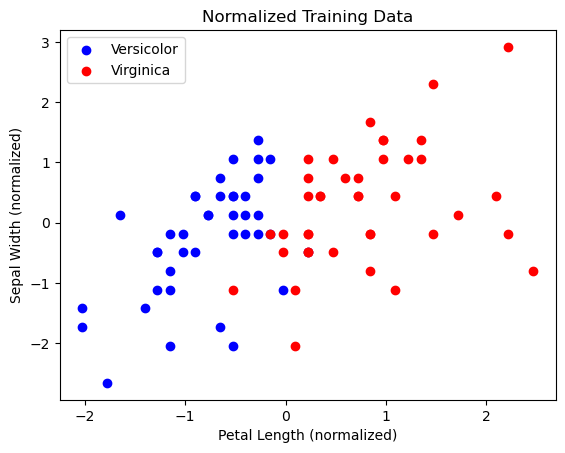

In [14]:
# Plot normalized training data
plt.scatter(X_train_normalized[y_train == 1][:, 0], X_train_normalized[y_train == 1][:, 1], color='b', label='Versicolor')
plt.scatter(X_train_normalized[y_train == -1][:, 0], X_train_normalized[y_train == -1][:, 1], color='r', label='Virginica')
plt.xlabel('Petal Length (normalized)')
plt.ylabel('Sepal Width (normalized)')
plt.title('Normalized Training Data')
plt.legend()
plt.show()

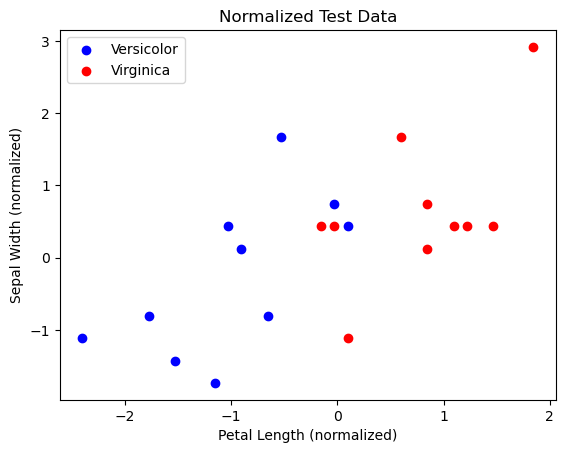

In [15]:
# Plot normalized test data
plt.scatter(X_test_normalized[y_test == 1][:, 0], X_test_normalized[y_test == 1][:, 1], color='b', label='Versicolor')
plt.scatter(X_test_normalized[y_test == -1][:, 0], X_test_normalized[y_test == -1][:, 1], color='r', label='Virginica')
plt.xlabel('Petal Length (normalized)')
plt.ylabel('Sepal Width (normalized)')
plt.title('Normalized Test Data')
plt.legend()
plt.show()

In [16]:
# Randomly initialize weights and bias with normal distribution
np.random.seed(42)  # for reproducibility
weights = np.random.normal(size=2)
bias = np.random.normal(size=1)

# Print the initialized weights and bias
weights, bias

(array([ 0.49671415, -0.1382643 ]), array([0.64768854]))

In [17]:
# Input sample features
sample_features = np.array([4.7, 2.4])

# Calculate the weighted sum for the perceptron
weighted_sum = np.dot(weights, sample_features) + bias

# Define the activation function
def activation_function(sigma):
    return 1 if sigma >= 0 else -1

# Calculate the output value
output_value = activation_function(weighted_sum)

# Print the output value
print(f'Output value: {output_value}')

Output value: 1


In [18]:
# Define the activation function
def activation_function(sigma):
    return 1 if sigma >= 0 else -1

In [19]:
# Train the perceptron
def train_perceptron(X_train, y_train, X_test, y_test, learning_rate, epochs):
    # Initialize weights and bias
    np.random.seed(42)
    weights = np.random.normal(size=2)
    bias = np.random.normal(size=1)

    train_accuracy = []
    test_accuracy = []

    for epoch in range(epochs):
        for i in range(len(y_train)):
            x_i = X_train[i]
            y_i = y_train[i]
            weighted_sum = np.dot(weights, x_i) + bias
            y_pred = activation_function(weighted_sum)
            # Update weights and bias based on the formula
            weights = weights + learning_rate * (y_i - y_pred) * x_i
            bias = bias + learning_rate * (y_i - y_pred)

        # Calculate training accuracy
        train_predictions = np.array([activation_function(np.dot(weights, x) + bias) for x in X_train])
        train_accuracy.append(np.mean(train_predictions == y_train))

        # Calculate test accuracy
        test_predictions = np.array([activation_function(np.dot(weights, x) + bias) for x in X_test])
        test_accuracy.append(np.mean(test_predictions == y_test))

    return weights, bias, train_accuracy, test_accuracy

In [20]:
# Grid-search for the best learning rate
learning_rates = [0.003, 0.01, 0.03]
epochs = 5
results = {}

for lr in learning_rates:
    weights, bias, train_acc, test_acc = train_perceptron(X_train_normalized, y_train, X_test_normalized, y_test, lr, epochs)
    results[lr] = {'train_accuracy': train_acc, 'test_accuracy': test_acc}

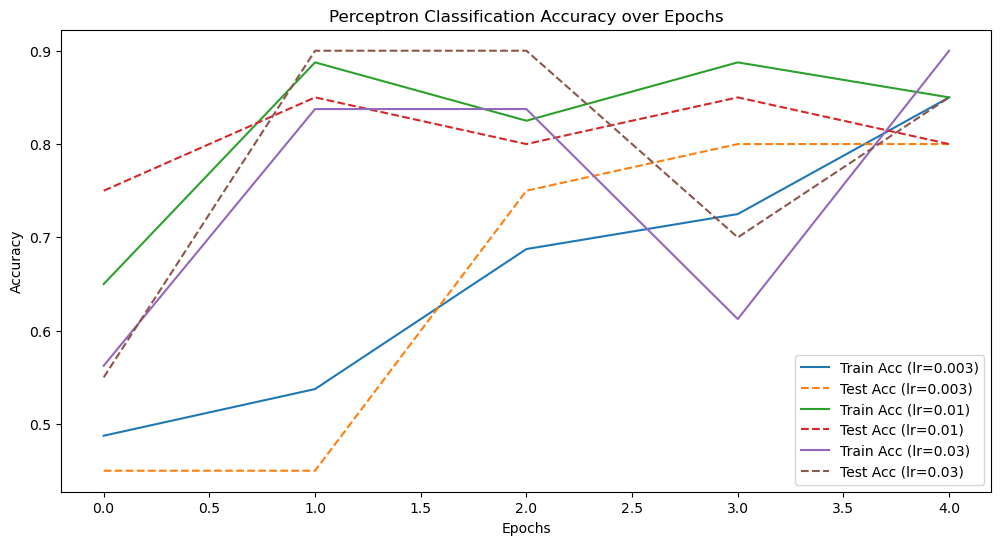

In [21]:
# Plot the results
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    plt.plot(range(epochs), results[lr]['train_accuracy'], label=f'Train Acc (lr={lr})')
    plt.plot(range(epochs), results[lr]['test_accuracy'], linestyle='--', label=f'Test Acc (lr={lr})')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Perceptron Classification Accuracy over Epochs')
plt.legend()
plt.show()

In [22]:
# Display the results in a table with a centered title
result_table = pd.DataFrame({f'Train Acc (lr={lr})': results[lr]['train_accuracy'] for lr in learning_rates})
result_table = result_table.join(pd.DataFrame({f'Test Acc (lr={lr})': results[lr]['test_accuracy'] for lr in learning_rates}))

# Print the centered title
title = "Classification Accuracy over Epochs for Different Learning Rates"
print("\n" + title.center(len(result_table.to_string().split('\n')[1])) + "\n")
print(result_table.to_string(index=False))


                               Classification Accuracy over Epochs for Different Learning Rates                               

 Train Acc (lr=0.003)  Train Acc (lr=0.01)  Train Acc (lr=0.03)  Test Acc (lr=0.003)  Test Acc (lr=0.01)  Test Acc (lr=0.03)
               0.4875               0.6500               0.5625                 0.45                0.75                0.55
               0.5375               0.8875               0.8375                 0.45                0.85                0.90
               0.6875               0.8250               0.8375                 0.75                0.80                0.90
               0.7250               0.8875               0.6125                 0.80                0.85                0.70
               0.8500               0.8500               0.9000                 0.80                0.80                0.85
